In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style="darkgrid")
import scipy as sp
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from datetime import datetime
import shap

In [2]:
exec(open("../../header.py").read())

# Import data

In [3]:
X = pd.read_csv(processed_root('cervical_cancer_risks/X.csv'))
y = pd.read_csv(processed_root('cervical_cancer_risks/y.csv'))

In [18]:
X = (X - np.mean(X, axis = 0))/np.std(X, axis = 0)
X = X.dropna(axis = 1)

# Fit model

In [19]:
model = SVC(kernel = "linear", probability = True)
model.fit(X, y['Biopsy'])

SVC(kernel='linear', probability=True)

# Comparison

In [20]:
exec(open("../../header.py").read())

In [21]:
shapley = SHAP_FI("linear")
native = Native_FI()
ice = ICE("binary")
pfi = PFI_FI(y['Biopsy'])

fi_metrics = [ice, native, shapley, pfi]

In [22]:
comparator = Comparator(trace = True)

In [23]:
comparator.fit(X, model, fi_metrics)

Fitting for <__main__.ICE object at 0x0000011901A61BB0>
Fitting for <__main__.Native_FI object at 0x0000011901A61C70>
Fitting for <__main__.SHAP_FI object at 0x0000011901A617C0>
Fitting for <__main__.PFI_FI object at 0x0000011901A61220>
PFI fits in 1.96 seconds


# Results

In [24]:
comparator.build_raw_table()

,Feature,ICE FI,ICE In-Dist FI,Native Feature Importance,Shapley Value,PFI
0,Age,2.118357e-06,2.118202e-06,-0.000078,2.935782e-06,0.000000
1,Number of sexual partners,8.458849e-07,8.451812e-07,-0.000031,-2.492253e-06,0.000000
2,First sexual intercourse,5.497404e-07,5.499636e-07,-0.000020,-1.836325e-07,0.000000
3,Num of pregnancies,5.692141e-08,5.691351e-08,0.000002,1.484854e-07,0.000000
4,Smokes,1.558686e-06,1.560350e-06,-0.000057,8.931654e-06,0.000000
5,Smokes (years),3.319229e-04,3.293146e-04,0.011964,-1.410925e-03,0.000000
6,Smokes (packs/year),4.080052e-03,4.122033e-03,-0.125867,8.434627e-03,0.001166
7,Hormonal Contraceptives,1.251129e-06,1.251080e-06,-0.000046,-1.542098e-05,0.000000
8,Hormonal Contraceptives (years),7.675561e-07,7.670392e-07,0.000028,4.115635e-06,0.000000
9,IUD,7.090651e-07,7.090509e-07,0.000026,-7.192611e-07,0.000000


In [26]:
# comparator.build_normalized_table()
comparator.build_normalized_table().sort_values('Native Feature Importance', ascending = False).reset_index(drop = True)
comparator.build_normalized_table().sort_values('ICE FI', ascending = False).reset_index(drop = True)

,Feature,ICE FI,ICE In-Dist FI,Native Feature Importance,Shapley Value,PFI
0,STDs: Time since last diagnosis,32.712417,23.146469,19.681193,22.000166,19.760101
1,STDs: Time since first diagnosis,13.797497,19.109629,20.159294,25.389903,24.684343
2,Dx:Cancer,8.825237,9.699626,7.326003,12.139452,10.921717
3,STDs,8.736716,9.839718,11.421049,3.759856,21.212121
4,Dx:CIN,6.425675,7.062320,5.274613,6.780251,4.797980
5,Dx,4.873833,5.356724,8.538248,1.311043,4.797980
6,STDs:HIV,4.303781,4.415994,4.773737,5.094154,10.037879
7,Smokes (packs/year),3.208007,3.562130,3.258668,2.726358,0.631313
8,STDs (number),3.146480,3.201690,3.381601,3.551848,0.441919
9,STDs:genital herpes,3.105182,2.630500,2.904455,1.312721,1.262626


# Correlations

In [27]:
import seaborn as sn

In [28]:
?sn.heatmap

(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0.5, 0, 'ICE FI'),
  Text(1.5, 0, 'ICE In-Dist FI'),
  Text(2.5, 0, 'Native Feature Importance'),
  Text(3.5, 0, 'Shapley Value'),
  Text(4.5, 0, 'PFI')])

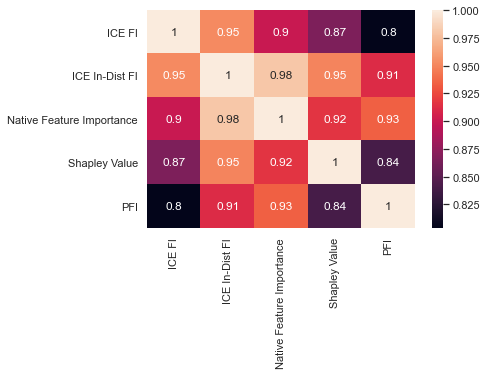

In [29]:
norm_vals = comparator\
    .build_normalized_table()\
    .iloc[:,1:]\

corr_matrix = norm_vals\
    .pipe(np.corrcoef, rowvar = False)

sn.heatmap(corr_matrix, 
           annot = True,
           yticklabels = norm_vals.columns,
           xticklabels = norm_vals.columns)

plt.xticks(rotation=90)

# To show

In [ ]:
def head_and_tail(df, k):
    return df.head(k).append(df.tail(k))

In [ ]:
results = comparator\
    .build_normalized_table()\
    .loc[:,['Feature', 'ICE FI', 'Native Feature Importance']]\
    .assign(Difference = lambda x:x['ICE FI'] - x['Native Feature Importance'])\
    .sort_values('Difference', ascending = False)\
    .pipe(head_and_tail, k = 3)\
    .reset_index(drop = True)\
    .round(1)

In [ ]:
caption = 'Feature impact table for features in cervical cancer dataset with two largest and most negative difference between Random Forest feature importance and ICE Feature Impact.'
label = 'tab:top2_cancer_table'

print(results.to_latex(index = False,
                      caption = caption,
                      label = label))

In [ ]:
ice.ice_plot_single_feature('Age', mode = 'c-ice')

In [ ]:
ice.ice_plot_single_feature('STDs:Hepatitis B', mode = 'c-ice')